In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [62]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [63]:
column_mapping = {"parental level of education":"parental_level_of_education", "test preparation course":"test_preparation_course",
                 "math score":"math_score", "reading score":"reading_score", "writing score":"writing_score"}

data = data.rename(columns=column_mapping)

data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Descriptive Statisctics

In [64]:
data.shape

(1000, 8)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [66]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [67]:
data.describe(include=[object])

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


I wants the unique values for all the categorical columns

In [68]:
print(data["gender"].unique())
print(data["race/ethnicity"].unique())
print(data["parental_level_of_education"].unique())
print(data["lunch"].unique())
print(data["test_preparation_course"].unique())

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


<font size="5">Observations</font>

1. math_score has it minimum value to be 0 compare to the other subject score. There could be an extreme values. Also the mean and median is almost the same.
2. reading_score and writing_score values looks reasonable and the mean and median is so close.
4. Ofcourse we only have to gender male and female.
5. race_ethnicity have five groups with group C having the most frequency
6. parental_level_of_education have six values with master's been the highest level of eduction and some college been the most frequent value.
7. lunch have two values with standard having the most frequency
8. test_preparation_course have two values with none having the most frequency

<font size="5">Let's Visualize the spread of the scores</font>

<Axes: xlabel='math_score', ylabel='Count'>

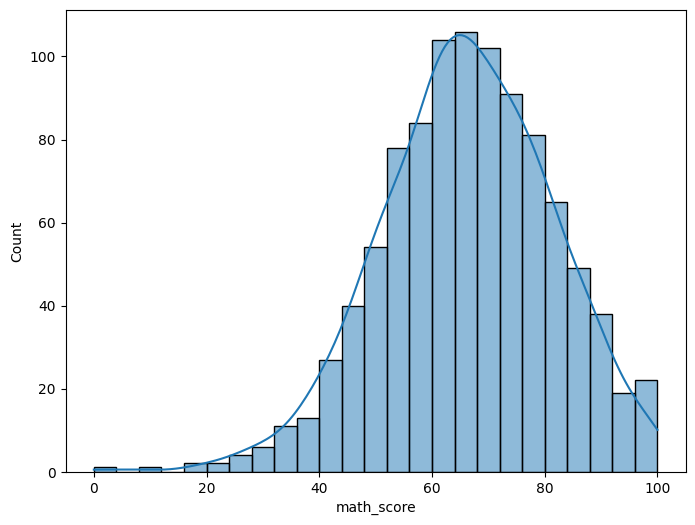

In [69]:
plt.figure(figsize=(8, 6))
sns.histplot(data["math_score"], kde=True)

<Axes: >

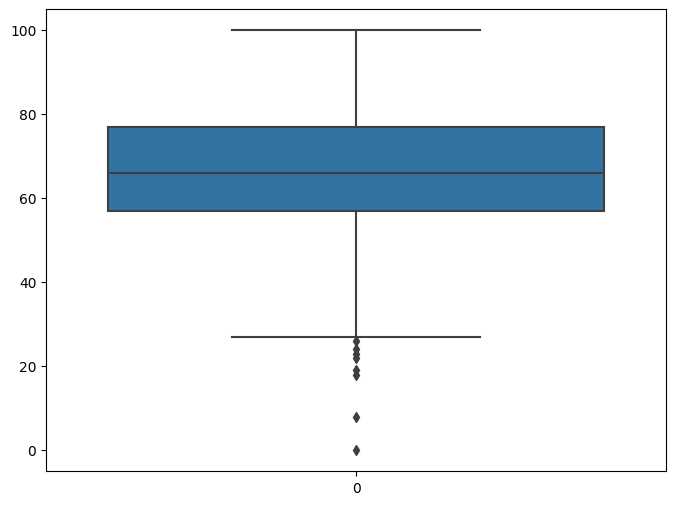

In [70]:
plt.figure(figsize=(8, 6))
sns.boxplot(data["math_score"])

<Axes: xlabel='reading_score', ylabel='Count'>

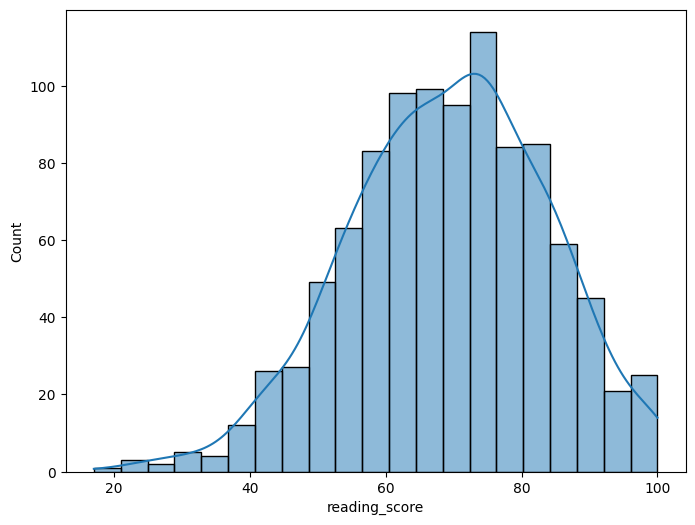

In [71]:
plt.figure(figsize=(8, 6))
sns.histplot(data["reading_score"], kde=True)

<Axes: >

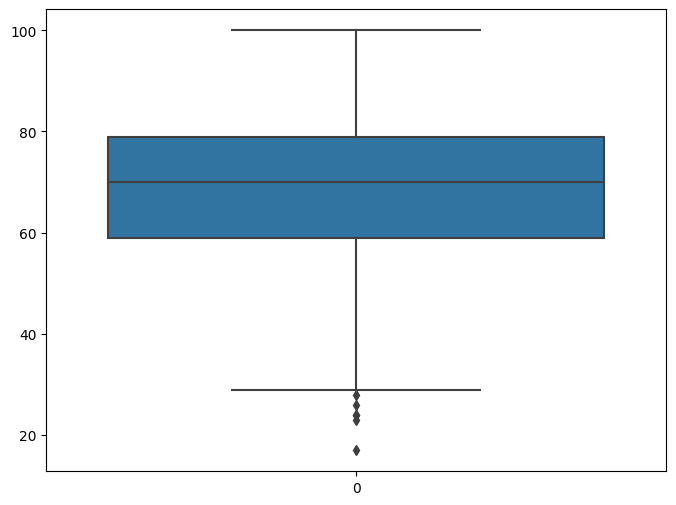

In [72]:
plt.figure(figsize=(8, 6))
sns.boxplot(data["reading_score"])

<Axes: xlabel='writing_score', ylabel='Count'>

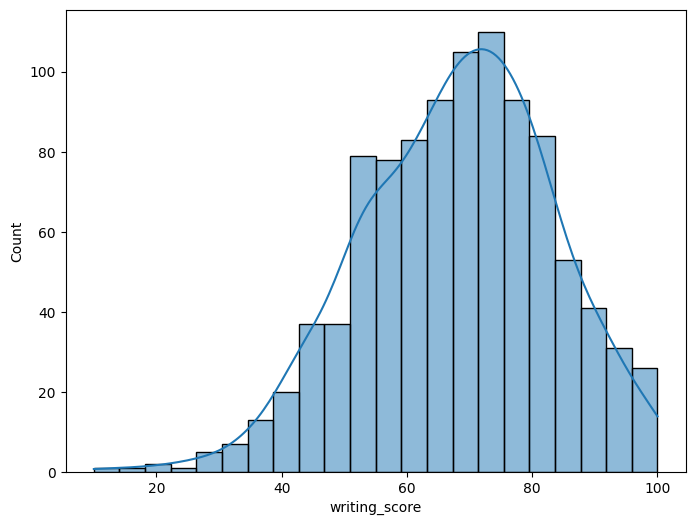

In [73]:
plt.figure(figsize=(8, 6))
sns.histplot(data["writing_score"], kde=True)

<Axes: >

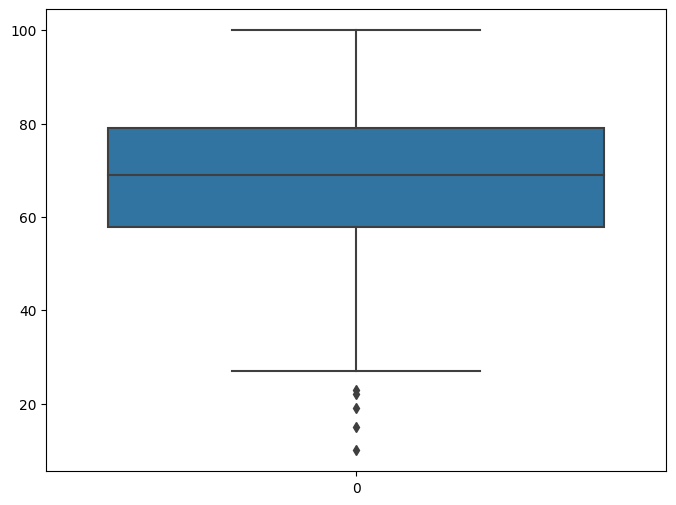

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(data["writing_score"])

I want to look at the perfomance of the students on different subjects based on gender. How do male and female students perform in math, reading, and writing?

In [75]:
gender_performance = data.groupby(by='gender')[['math_score', 'reading_score', 'writing_score']].sum()
gender_performance

,math_score,reading_score,writing_score
gender,,,
female,32962,37611,37538
male,33127,31558,30516


From my observation, the male gender performs better than the female gender in math_score. If we put to account that we have more female gender who sat for the exam. While the female gender perform better in reading_score and writing_score

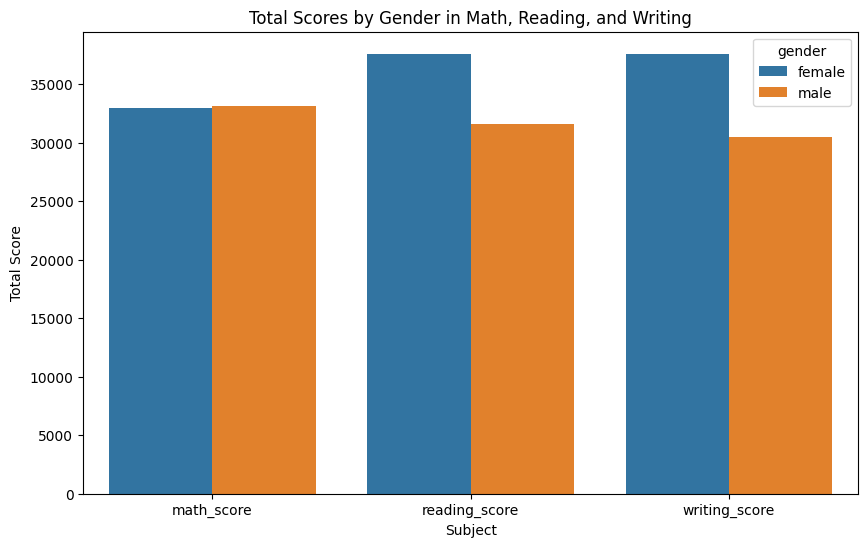

In [76]:
total_scores = data.melt(id_vars='gender', 
                         value_vars=['math_score', 'reading_score', 'writing_score'], 
                         var_name='Subject', 
                         value_name='Score').groupby(['gender', 'Subject'], as_index=False)['Score'].sum()

# Plot the total scores by gender and subject
plt.figure(figsize=(10, 6))
sns.barplot(data=total_scores, x='Subject', y='Score', hue='gender')
plt.title('Total Scores by Gender in Math, Reading, and Writing')
plt.ylabel('Total Score')
plt.xlabel('Subject')
plt.show()

In [77]:
stat = data.groupby(by='gender')[['math_score', 'reading_score', 'writing_score']].agg(['mean', 'std'])
stat

math_score            reading_score            writing_score           
             mean        std          mean        std          mean        std
gender                                                                        
female  63.633205  15.491453     72.608108  14.378245     72.467181  14.844842
male    68.728216  14.356277     65.473029  13.931832     63.311203  14.113832

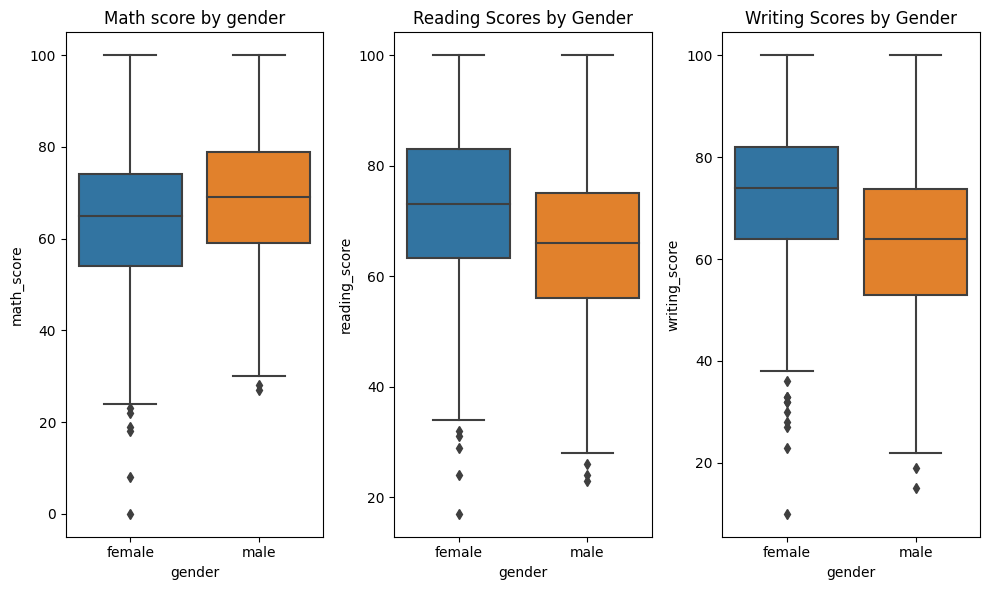

In [78]:
plt.figure(figsize = (10,6))

plt.subplot(1,3,1)
sns.boxplot(x= 'gender', y = 'math_score', data = data)
plt.title('Math score by gender')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading_score', data=data)
plt.title('Reading Scores by Gender')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing_score', data=data)
plt.title('Writing Scores by Gender')

plt.tight_layout()

<font size="5">Observations on Descriptive Statistics</font>
1. Math Scores:

Mean: Male students have a higher average math score (68.73) compared to female students (63.63).
Standard Deviation: The standard deviation for math scores is slightly higher for female students (15.49) compared to male students (14.36). This indicates that there is more variability in math scores among female students.

2. Reading Scores:

Mean: Female students have a significantly higher average reading score (72.61) compared to male students (65.47).
Standard Deviation: The standard deviation for reading scores is relatively similar for both genders, with females having a slightly higher standard deviation (14.38) compared to males (13.93). This suggests that the variability in reading scores is almost the same for both genders.

3. Writing Scores:

Mean: Female students also have a higher average writing score (72.47) compared to male students (63.31).
Standard Deviation: The standard deviation for writing scores is slightly higher for female students (14.84) compared to male students (14.11), indicating a bit more variability in writing scores among female students.
Observations
Performance Trends:

<font size="5">Observations</font>

Male Students: Perform better on average in math compared to female students. Female Students: Perform better on average in reading and writing compared to male students.

To further validate these observations, it is important to perform hypothesis testing (t-tests) to determine if these differences in means are statistically significant. This will provide a more rigorous analysis and help in making data-driven decisions.

# Hypothesis Testing

<font size="5">I'll formulate the null hypothesis (H0) and the alternative hypothesis (H1):</font>

1. null hypothesis (H0): There is no significant difference in performance between male and female students.
2. alternative hypothesis (H1): There is a significant difference in performance between male and female students.

<font size="5">Choose a signficance level</font>

1. I'll chose 5% to be oue significance level.

2. I'll Perform an independent t-test for each subject to compare the means of the two groups (male and female).

In [79]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [80]:
data['gender_type'] = data['gender']

map_dict = {'male':1, 'female':2}

data['gender_type'] = data['gender_type'].map(map_dict)

In [81]:
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,gender_type
0,female,group B,bachelor's degree,standard,none,72,72,74,2
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


In [85]:
from scipy.stats import ttest_ind

female_score = data[data['gender_type'] == 2]
male_score = data[data['gender_type'] == 1]

t_stat_math, p_val_math = ttest_ind(a=female_score['math_score'], b=male_score['math_score'], equal_var=False)

t_stat_reading, p_val_reading = ttest_ind(a=female_score['reading_score'], b=male_score['reading_score'], equal_var=False)

t_stat_writing, p_val_writing = ttest_ind(a=female_score['writing_score'], b=male_score['writing_score'], equal_var=False)

print(f'Math Score: t_statistics = {t_stat_math}, p_value = {p_val_math} \n')
print(f'Reading Score: t_statistics = {t_stat_reading}, p_value = {p_val_reading} \n')
print(f'Writing Score: t_statistics = {t_stat_writing}, p_value = {p_val_writing}')

Math Score: t_statistics = -5.398000564160736, p_value = 8.420838109090415e-08 

Reading Score: t_statistics = 7.9683565184844, p_value = 4.3762967534977204e-15 

Writing Score: t_statistics = 9.997718973491885, p_value = 1.711809371849699e-22


<font size="5">Interpretation</font>

1. Math Scores:

p-value: 8.420838109090415e-08

Interpretation: The p-value is much smaller than 0.05, so we reject the null hypothesis. There is a statistically significant difference in math scores between male and female students.
   
2. Reading Scores:

p-value: 4.3762967534977204e-15

Interpretation: The p-value is much smaller than 0.05, so we reject the null hypothesis. There is a statistically significant difference in reading scores between male and female students.

3. Writing Scores:

p-value: 1.711809371849699e-22

Interpretation: The p-value is much smaller than 0.05, so we reject the null hypothesis. There is a statistically significant difference in writing scores between male and female students.

<font size="5">Conclusion</font>

Based on the t-test results and the chosen significance level, I can conclude that there are statistically significant differences in performance between male and female students in math, reading, and writing. 